In [157]:
import random
import numpy as np
import math
import pandas as pd
from matplotlib import pyplot as plt

In [182]:
font_syn = {'weight' : 'normal',
'size'   : 20,
}

In [183]:
cog_p = 8
ene_p = 4
emo_p = 12
cog_a = 70 
ene_a = 90
emo_a = 80

In [189]:
x = np.linspace(0, 24, 100)
x

array([ 0.        ,  0.24242424,  0.48484848,  0.72727273,  0.96969697,
        1.21212121,  1.45454545,  1.6969697 ,  1.93939394,  2.18181818,
        2.42424242,  2.66666667,  2.90909091,  3.15151515,  3.39393939,
        3.63636364,  3.87878788,  4.12121212,  4.36363636,  4.60606061,
        4.84848485,  5.09090909,  5.33333333,  5.57575758,  5.81818182,
        6.06060606,  6.3030303 ,  6.54545455,  6.78787879,  7.03030303,
        7.27272727,  7.51515152,  7.75757576,  8.        ,  8.24242424,
        8.48484848,  8.72727273,  8.96969697,  9.21212121,  9.45454545,
        9.6969697 ,  9.93939394, 10.18181818, 10.42424242, 10.66666667,
       10.90909091, 11.15151515, 11.39393939, 11.63636364, 11.87878788,
       12.12121212, 12.36363636, 12.60606061, 12.84848485, 13.09090909,
       13.33333333, 13.57575758, 13.81818182, 14.06060606, 14.3030303 ,
       14.54545455, 14.78787879, 15.03030303, 15.27272727, 15.51515152,
       15.75757576, 16.        , 16.24242424, 16.48484848, 16.72

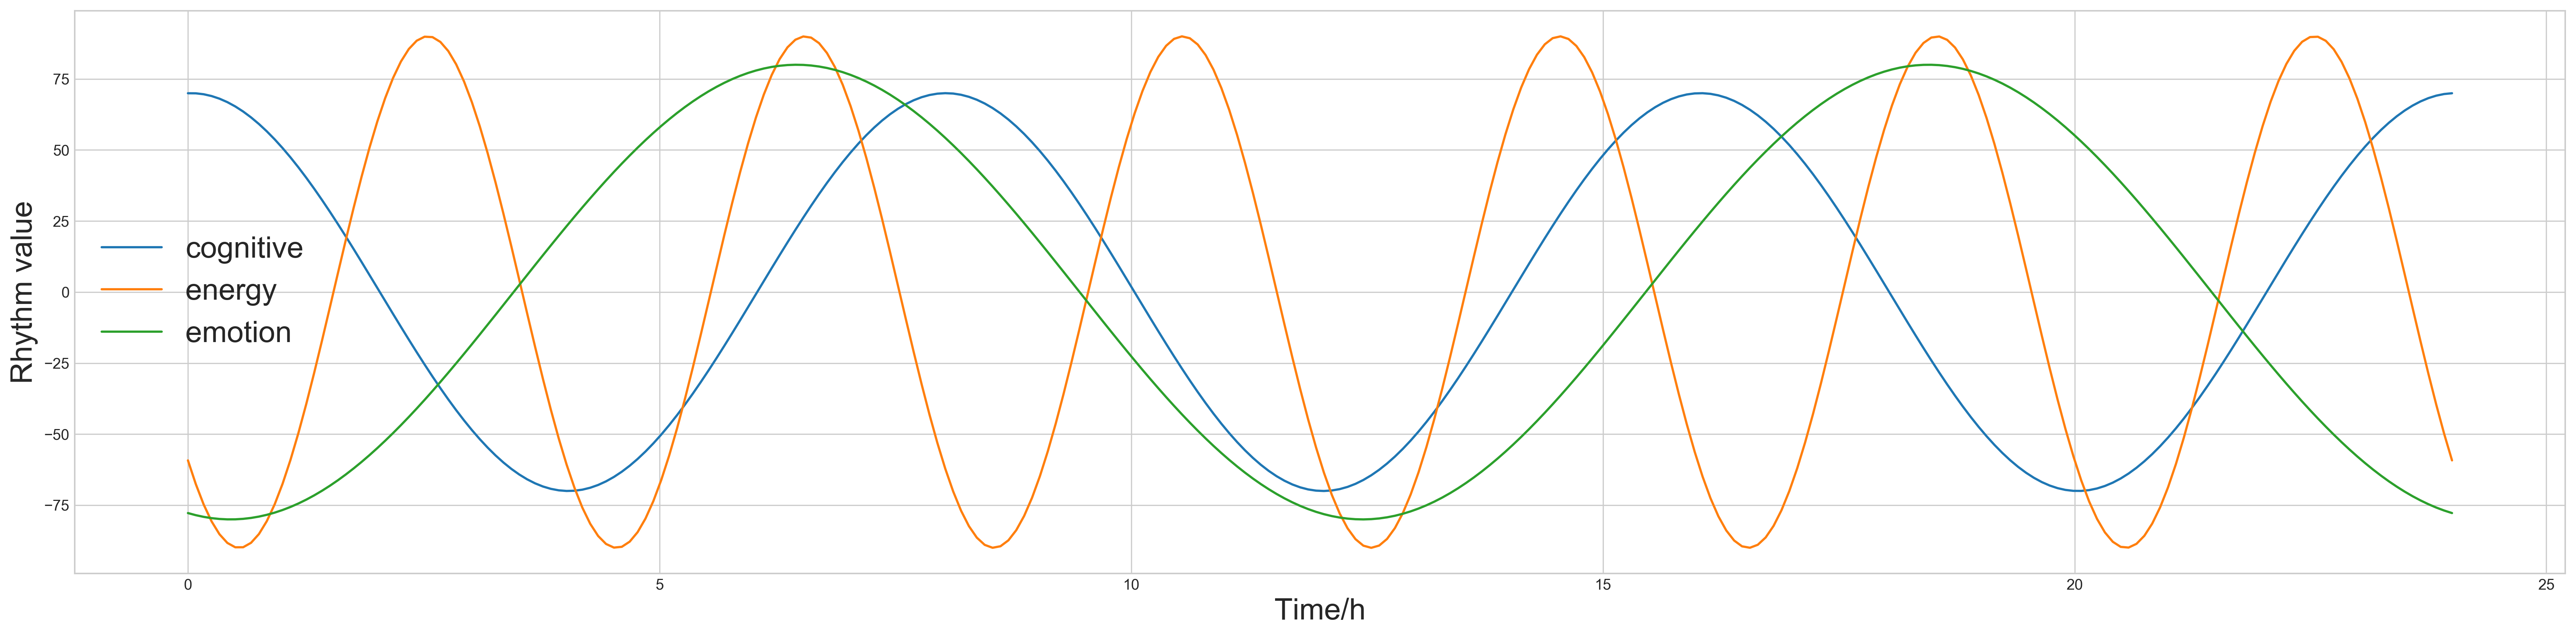

In [197]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(24, 6), dpi=300)
x = np.linspace(0, 24, 24 * 12)
y_cog = cog_a * np.sin(2 * np.pi * x / cog_p + 2 * np.pi * random.random()) 
y_ene = ene_a * np.sin(2 * np.pi * x / ene_p + 2 * np.pi * random.random()) 
y_emo = emo_a * np.sin(2 * np.pi * x / emo_p + 2 * np.pi * random.random())
plt.plot(x, y_cog, label = 'cognitive')
plt.plot(x, y_ene, label = 'energy')
plt.plot(x, y_emo, label = 'emotion')
plt.xlabel('Time/h', font_syn)
plt.ylabel('Rhythm value', font_syn)
plt.legend(prop = font_syn)
plt.tight_layout()
plt.savefig('static_rhythm.png', dpi = 300)
plt.show()

In [2]:
time_reso = ['08:00', '08:20', '08:40',
             '09:00', '09:20', '09:40',
             '10:00', '10:20', '10:40',
             '11:00', '11:20', '11:40',
             '12:00', '12:20', '12:40',
             '13:00', '13:20', '13:40',
             '14:00', '14:20', '14:40',
             '15:00', '15:20', '15:40',
             '16:00', '16:20', '16:40',
             '17:00', '17:20', '17:40',
             '18:00', '18:20', '18:40',
             '19:00', '19:20', '19:40',
             '20:00', '20:20', '20:40',
             '21:00', '21:20', '21:40',
             '22:00', '22:20', '22:40',
             '23:00', '23:20', '23:40',
             '00:00', '00:20', '00:40',
             '01:00', '01:20', '01:40',
             '02:00', '02:20', '02:40',
             '03:00', '03:20', '03:40',
             '04:00', '04:20', '04:40',
             '05:00', '05:20', '05:40',
             '06:00', '06:20', '06:40',
             '07:00', '07:20', '07:40',
            ]

In [3]:
class_schedule = {
    'Mon' : [['09:20', '10:40'], ['14:00', '15:20']],
    'Tue' : [],
    'Wed' : [['09:20', '10:40'], ['14:00', '15:20']],
    'Thur': [],
    'Fri' : [],
    'Sta' : [],
    'Sun' : [],
}

In [4]:
next_state = {
    'sleep': ['exercise', 'study', 'sleep'],
    'class': ['exercise', 'study', 'rest'],
    'exercise': ['study', 'rest', 'exercise'],
    'study': ['exercise', 'rest', 'study', 'sleep'],
    'rest': ['exercise', 'study', 'rest', 'sleep']
}

In [5]:
energy_cost = {
    'sleep' : 12,
    'class' : -10,
    'exercise' : -18,
    'study' : -8,
    'rest' : 6
}

In [6]:
def sleep_reward(energy, mood, cog, high_energy, low_energy):
    reward_value = 0
    if energy >= high_energy:
        reward_value = -30
    if low_energy < energy < high_energy:
        reward_value = -12
    else:
        reward_value = 10
        
    return reward_value

In [7]:
def class_reward(energy, mood, cog, high_energy, low_energy):
    reward_value = 0
    if energy >= high_energy:
        reward_value = 15
    elif low_energy < energy <high_energy:
        reward_value = 10
    else:
        reward_value = -10
    
    return reward_value

In [8]:
def exercise_reward(energy, mood, cog, high_energy, low_energy):
    reward_value = 0
    if energy >= high_energy:
        reward_value = 20
    elif low_energy < energy <high_energy:
        reward_value = 0
    else:
        reward_value = -20
    
    return reward_value

In [9]:
def study_reward(energy, mood, cog, high_energy, low_energy):
    reward_value = 0
    if energy >= high_energy:
        reward_value = 10
    elif low_energy < energy <high_energy:
        reward_value = 8
    else:
        reward_value = -5
    
    return reward_value

In [10]:
def rest_reward(energy, mood, cog, high_energy, low_energy):
    reward_value = 0
    if energy >= high_energy:
        reward_value = -12
    elif low_energy < energy <high_energy:
        reward_value = 2
    else:
        reward_value = 12
    
    return reward_value

In [11]:
def reward_func(energy, mood, cog, cur_state):
    if cur_state == 'sleep':
        high_energy = 20
        low_energy = 5
    elif cur_state == 'class':
        high_energy = 70
        low_energy = 50
    elif cur_state == 'exercise':
        high_energy = 80
        low_energy = 60
    elif cur_state == 'study':
        high_energy = 60
        low_energy = 40
    else:
        high_energy = 40
        low_energy = 10
        
    if cur_state == 'sleep':
        reward_value = sleep_reward(energy, mood, cog, high_energy, low_energy)
    if cur_state == 'class':
        reward_value = class_reward(energy, mood, cog, high_energy, low_energy)
    if cur_state == 'exercise':
        reward_value = exercise_reward(energy, mood, cog, high_energy, low_energy)
    if cur_state == 'study':
        reward_value = study_reward(energy, mood, cog, high_energy, low_energy)
    if cur_state == 'rest':
        reward_value = rest_reward(energy, mood, cog, high_energy, low_energy)
    
    return reward_value

In [12]:
def class_time(day, class_schedule, time_reso):
    time_list = []
    class_list = class_schedule[day]
    for each_class in class_list:
        start_time = time_reso.index(each_class[0])
        end_time = time_reso.index(each_class[1])
        for i in range(start_time, end_time + 1):
            time_list.append(time_reso[i])
            
    return time_list

In [31]:
def daily_mdp_random(ini_state, ini_energy, reso, class_list):
    sleep_flag = 0
    cum_reward = 0
    result = []
    cur_state = ini_state
    cur_energy = ini_energy
    for i in range(24 * reso):
        if time_reso[i] == '22:00':
            sleep_flag = 1
        
        if time_reso[i] in class_list:
            cur_state = 'class'
            next_energy = energy_cost[cur_state] + cur_energy
        else:
            if cur_state == 'sleep':
                if sleep_flag == 1:
                    p = 2
                else:
                    p = random.randint(0, 1)
                cur_state = next_state[cur_state][p]
                next_energy = energy_cost[cur_state] + cur_energy
            
            if cur_state == 'class':
                p = random.randint(0, 2)
                cur_state = next_state[cur_state][p]
                next_energy = energy_cost[cur_state] + cur_energy
            
            if cur_state == 'exercise':
                p = random.randint(0, 2)
                cur_state = next_state[cur_state][p]
                next_energy = energy_cost[cur_state] + cur_energy
            
            if cur_state == 'study':
                if sleep_flag == 0:
                    p = random.randint(0, 2)
                else:
                    p = random.randint(0, 3)
                    
                cur_state = next_state[cur_state][p]
                next_energy = energy_cost[cur_state] + cur_energy
            
            if cur_state == 'rest':
                if sleep_flag == 0:
                    p = random.randint(0, 2)
                
                else:
                    p = random.randint(0, 3)
                    
                cur_state = next_state[cur_state][p]
                next_energy = energy_cost[cur_state] + cur_energy
            
        cur_mood = 0
        cur_cog = 0
        cur_reward = reward_func(cur_energy, cur_mood, cur_cog, cur_state)
        result.append([time_reso[i], cur_state, cur_reward])
        print([time_reso[i], cur_state, cur_reward])
        cum_reward += cur_reward
        cur_energy = next_energy
        
    return result

In [63]:
def daily_mdp_mcmc(ini_state, ini_energy, reso, class_list):
    sleep_flag = 0
    cum_reward = 0
    result = []
    cur_state = ini_state
    cur_energy = ini_energy
    for i in range(24 * reso):
        if time_reso[i] == '22:00':
            sleep_flag = 1
        
        if time_reso[i] in class_list:
            cur_state = 'class'
            next_energy = energy_cost[cur_state] + cur_energy
        else:
            if cur_state == 'sleep':
                if sleep_flag == 1:
                    p = 2
                else:
                    p = random.randint(0, 1)
                cur_state = next_state[cur_state][p]
                next_energy = energy_cost[cur_state] + cur_energy
            
            if cur_state == 'class':
                p = random.randint(0, 2)
                cur_state = next_state[cur_state][p]
                next_energy = energy_cost[cur_state] + cur_energy
            
            if cur_state == 'exercise':
                p = random.randint(0, 2)
                cur_state = next_state[cur_state][p]
                next_energy = energy_cost[cur_state] + cur_energy
            
            if cur_state == 'study':
                if sleep_flag == 0:
                    p = random.randint(0, 2)
                else:
                    p = random.randint(0, 3)
                    
                cur_state = next_state[cur_state][p]
                next_energy = energy_cost[cur_state] + cur_energy
            
            if cur_state == 'rest':
                if sleep_flag == 0:
                    p = random.randint(0, 2)
                
                else:
                    p = random.randint(0, 3)
                    
                cur_state = next_state[cur_state][p]
                next_energy = energy_cost[cur_state] + cur_energy
            
        cur_mood = 0
        cur_cog = 0
        cur_reward = reward_func(cur_energy, cur_mood, cur_cog, cur_state)
        result.append([time_reso[i], cur_state, cur_reward])
        cum_reward += cur_reward
        cur_energy = next_energy
        
    return result

In [114]:
def daily_mdp_mcmc_op(ini_state, ini_energy, reso, class_list, num_iter):
    ini_reward = 330
    op_policy = []
    for i in range(num_iter):
        reward_result, cum_reward = daily_mdp_mcmc(ini_state, ini_energy, reso, class_list)
        #print(cum_reward)
        if cum_reward > ini_reward:
            ini_reward = cum_reward
            op_policy = reward_result
            print(ini_reward)
    
    return op_policy

In [16]:
def greedy_str(energy, mood, cog, poten_state):
    reward_list = []
    for state in poten_state:
        reward_list.append(reward_func(energy, mood, cog, state))
    
    max_index = reward_list.index(max(reward_list))
    if isinstance(max_index,list):
        p = random.randint(0, len(max_index) - 1)
        better_state = poten_state[max_index[p]]
    else:
        better_state = poten_state[max_index]
    
    return better_state

In [85]:
def daily_mdp_greedy(ini_state, ini_energy, reso, class_list):
    sleep_flag = 0
    cum_reward = 0
    cur_mood = 0
    cur_cog = 0
    result = []
    cur_state = ini_state
    cur_energy = ini_energy
    for i in range(24 * reso):
        potential_state = []
        if time_reso[i] == '22:00':
            sleep_flag = 1
        
        if time_reso[i] in class_list:
            cur_state = 'class'
            next_energy = energy_cost[cur_state] + cur_energy
        else:
            if cur_state == 'sleep':
                if sleep_flag == 1:
                    cur_state = 'sleep'
                else:
                    poten_state = ['exercise', 'study']
                    cur_state = greedy_str(cur_energy, cur_mood, cur_cog, poten_state)
                    next_energy = energy_cost[cur_state] + cur_energy
            
            if cur_state == 'class':
                poten_state = ['exercise', 'study', 'rest']
                cur_state = greedy_str(cur_energy, cur_mood, cur_cog, poten_state)
                next_energy = energy_cost[cur_state] + cur_energy
            
            if cur_state == 'exercise':
                poten_state = ['study', 'rest', 'exercise']
                cur_state = greedy_str(cur_energy, cur_mood, cur_cog, poten_state)
                next_energy = energy_cost[cur_state] + cur_energy
            
            if cur_state == 'study':
                if sleep_flag == 0:
                    poten_state = ['exercise', 'rest', 'study']
                else:
                    poten_state = ['exercise', 'rest', 'study', 'sleep']
                    
                cur_state = greedy_str(cur_energy, cur_mood, cur_cog, poten_state)
                next_energy = energy_cost[cur_state] + cur_energy
            
            if cur_state == 'rest':
                if sleep_flag == 0:
                    poten_state = ['exercise', 'study', 'rest']
                
                else:
                    poten_state = ['exercise', 'study', 'rest', 'sleep']
                    
                cur_state = greedy_str(cur_energy, cur_mood, cur_cog, poten_state)
                next_energy = energy_cost[cur_state] + cur_energy 
            
        cur_mood = 0
        cur_cog = 0
        cur_reward = reward_func(cur_energy, cur_mood, cur_cog, cur_state)
        result.append([time_reso[i], cur_state, cur_reward])
        print([time_reso[i], cur_state, cur_reward])
        cum_reward += cur_reward
        cur_energy = next_energy
        
    return result

In [82]:
ini_state = 'sleep'
ini_energy = 100
ini_mood = 0
ini_cog = 0
reso = 3
class_list = class_time('Mon', class_schedule, time_reso)
reward_result_random = daily_mdp_random(ini_state, ini_energy, reso, class_list)

['08:00', 'exercise', 20]
['08:20', 'rest', -12]
['08:40', 'study', 10]
['09:00', 'exercise', 20]
['09:20', 'class', 10]
['09:40', 'class', 10]
['10:00', 'class', -10]
['10:20', 'class', -10]
['10:40', 'class', -10]
['11:00', 'exercise', -20]
['11:20', 'exercise', -20]
['11:40', 'study', -5]
['12:00', 'study', -5]
['12:20', 'study', -5]
['12:40', 'exercise', -20]
['13:00', 'exercise', -20]
['13:20', 'study', -5]
['13:40', 'study', -5]
['14:00', 'class', -10]
['14:20', 'class', -10]
['14:40', 'class', -10]
['15:00', 'class', -10]
['15:20', 'class', -10]
['15:40', 'study', -5]
['16:00', 'exercise', -20]
['16:20', 'exercise', -20]
['16:40', 'study', -5]
['17:00', 'study', -5]
['17:20', 'rest', 12]
['17:40', 'exercise', -20]
['18:00', 'exercise', -20]
['18:20', 'exercise', -20]
['18:40', 'study', -5]
['19:00', 'exercise', -20]
['19:20', 'rest', 12]
['19:40', 'study', -5]
['20:00', 'study', -5]
['20:20', 'study', -5]
['20:40', 'rest', 12]
['21:00', 'study', -5]
['21:20', 'exercise', -20]
['

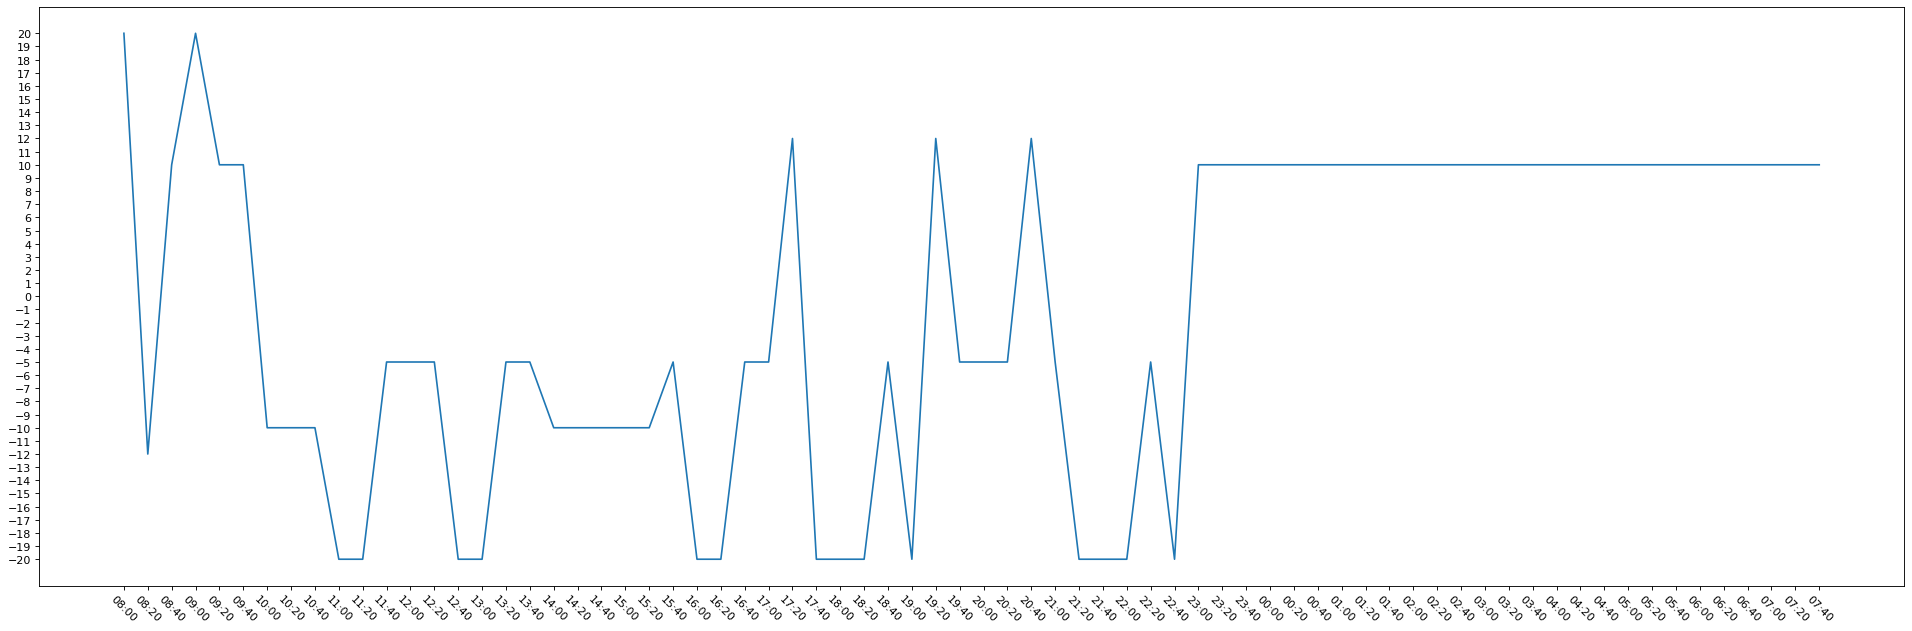

In [84]:
reward_result_pd = pd.DataFrame(reward_result_random, columns = ['time', 'activity', 'reward'])
fig = plt.figure(figsize=(24, 8), dpi=80)
x = reward_result_pd['time']
y = reward_result_pd['reward']
plt.plot(x, y)
plt.xticks(x, rotation=-45)
plt.yticks(range(min(y), max(y) + 1))
plt.tight_layout()
plt.show()

In [88]:
ini_state = 'sleep'
ini_energy = 100
ini_mood = 0
ini_cog = 0
reso = 3
class_list = class_time('Mon', class_schedule, time_reso)
reward_result_greedy = daily_mdp_greedy(ini_state, ini_energy, reso, class_list)

['08:00', 'exercise', 20]
['08:20', 'exercise', 20]
['08:40', 'study', 10]
['09:00', 'study', 8]
['09:20', 'class', -10]
['09:40', 'class', -10]
['10:00', 'class', -10]
['10:20', 'class', -10]
['10:40', 'class', -10]
['11:00', 'rest', 12]
['11:20', 'rest', 12]
['11:40', 'rest', 12]
['12:00', 'rest', 2]
['12:20', 'rest', 2]
['12:40', 'rest', 2]
['13:00', 'rest', 2]
['13:20', 'study', -5]
['13:40', 'rest', 2]
['14:00', 'class', -10]
['14:20', 'class', -10]
['14:40', 'class', -10]
['15:00', 'class', -10]
['15:20', 'class', -10]
['15:40', 'rest', 12]
['16:00', 'rest', 12]
['16:20', 'rest', 12]
['16:40', 'rest', 12]
['17:00', 'rest', 2]
['17:20', 'rest', 2]
['17:40', 'rest', 2]
['18:00', 'rest', 2]
['18:20', 'rest', 2]
['18:40', 'study', 8]
['19:00', 'rest', 2]
['19:20', 'study', -5]
['19:40', 'rest', 2]
['20:00', 'rest', 2]
['20:20', 'study', 8]
['20:40', 'rest', 2]
['21:00', 'study', 8]
['21:20', 'rest', 2]
['21:40', 'study', -5]
['22:00', 'sleep', 10]
['22:20', 'sleep', 10]
['22:40', 'sl

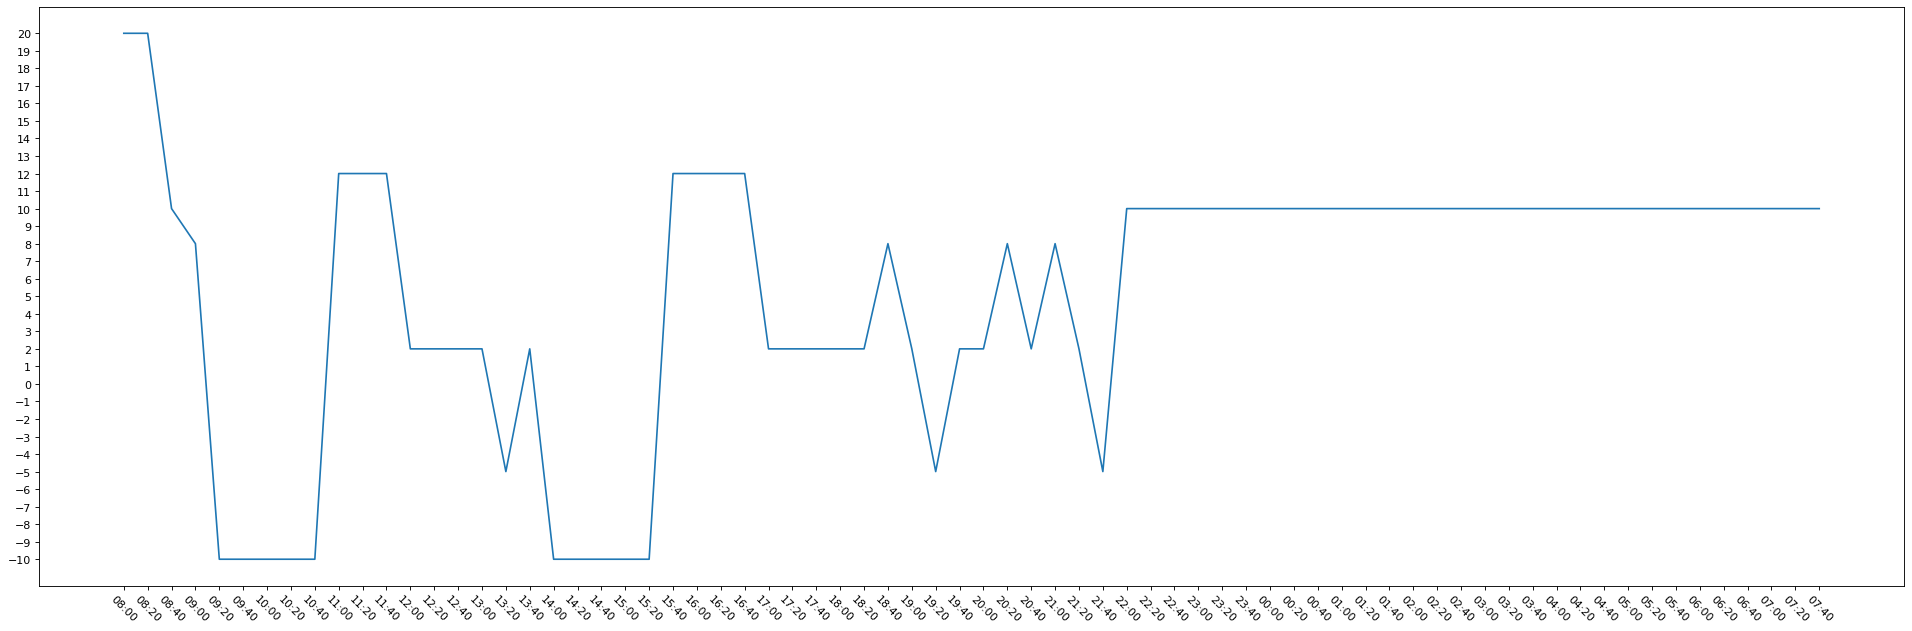

In [89]:
reward_result_pd = pd.DataFrame(reward_result_greedy, columns = ['time', 'activity', 'reward'])
fig = plt.figure(figsize=(24, 8), dpi=80)
x = reward_result_pd['time']
y = reward_result_pd['reward']
plt.plot(x, y)
plt.xticks(x, rotation=-45)
plt.yticks(range(min(y), max(y) + 1))
plt.tight_layout()
plt.show()

In [115]:
ini_state = 'sleep'
ini_energy = 100
ini_mood = 0
ini_cog = 0
reso = 3
num_iteration = 10000000
class_list = class_time('Mon', class_schedule, time_reso)
reward_result_mcmc = daily_mdp_mcmc_op(ini_state, ini_energy, reso, class_list, num_iteration)

345
349
350
367
368
370
384


In [135]:
reward_result_mcmc[46] = ['23:20', 'sleep', -5]

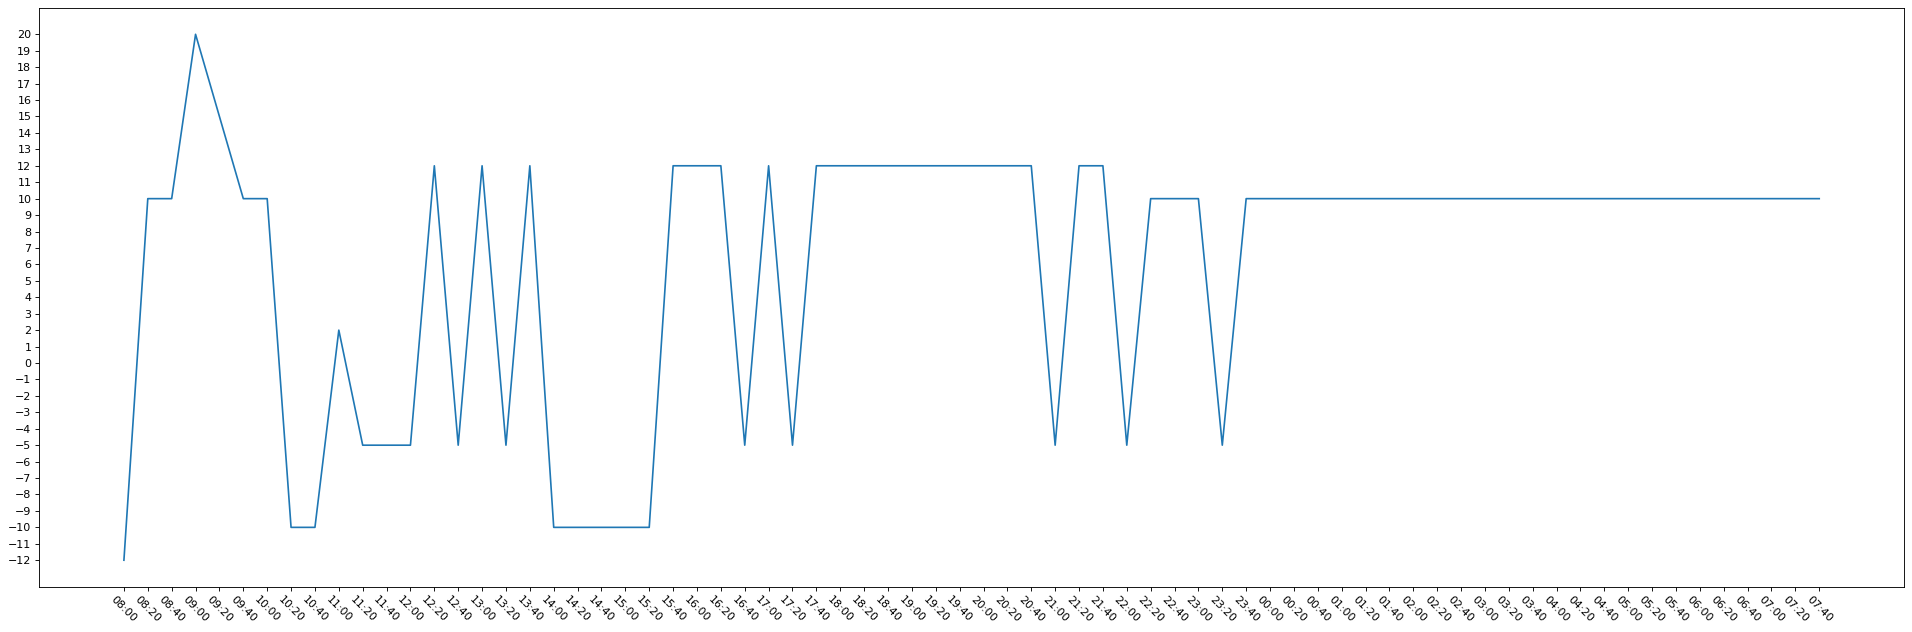

In [136]:
reward_result_pd = pd.DataFrame(reward_result_mcmc, columns = ['time', 'activity', 'reward'])
fig = plt.figure(figsize=(24, 8), dpi=80)
x = reward_result_pd['time']
y = reward_result_pd['reward']
plt.plot(x, y)
plt.xticks(x, rotation=-45)
plt.yticks(range(min(y), max(y) + 1))
plt.tight_layout()
plt.show()

In [161]:
font_label = {'weight' : 'normal',
'size' : 22,
}

In [166]:
font_legend = {'weight' : 'normal',
'size' : 18,
}

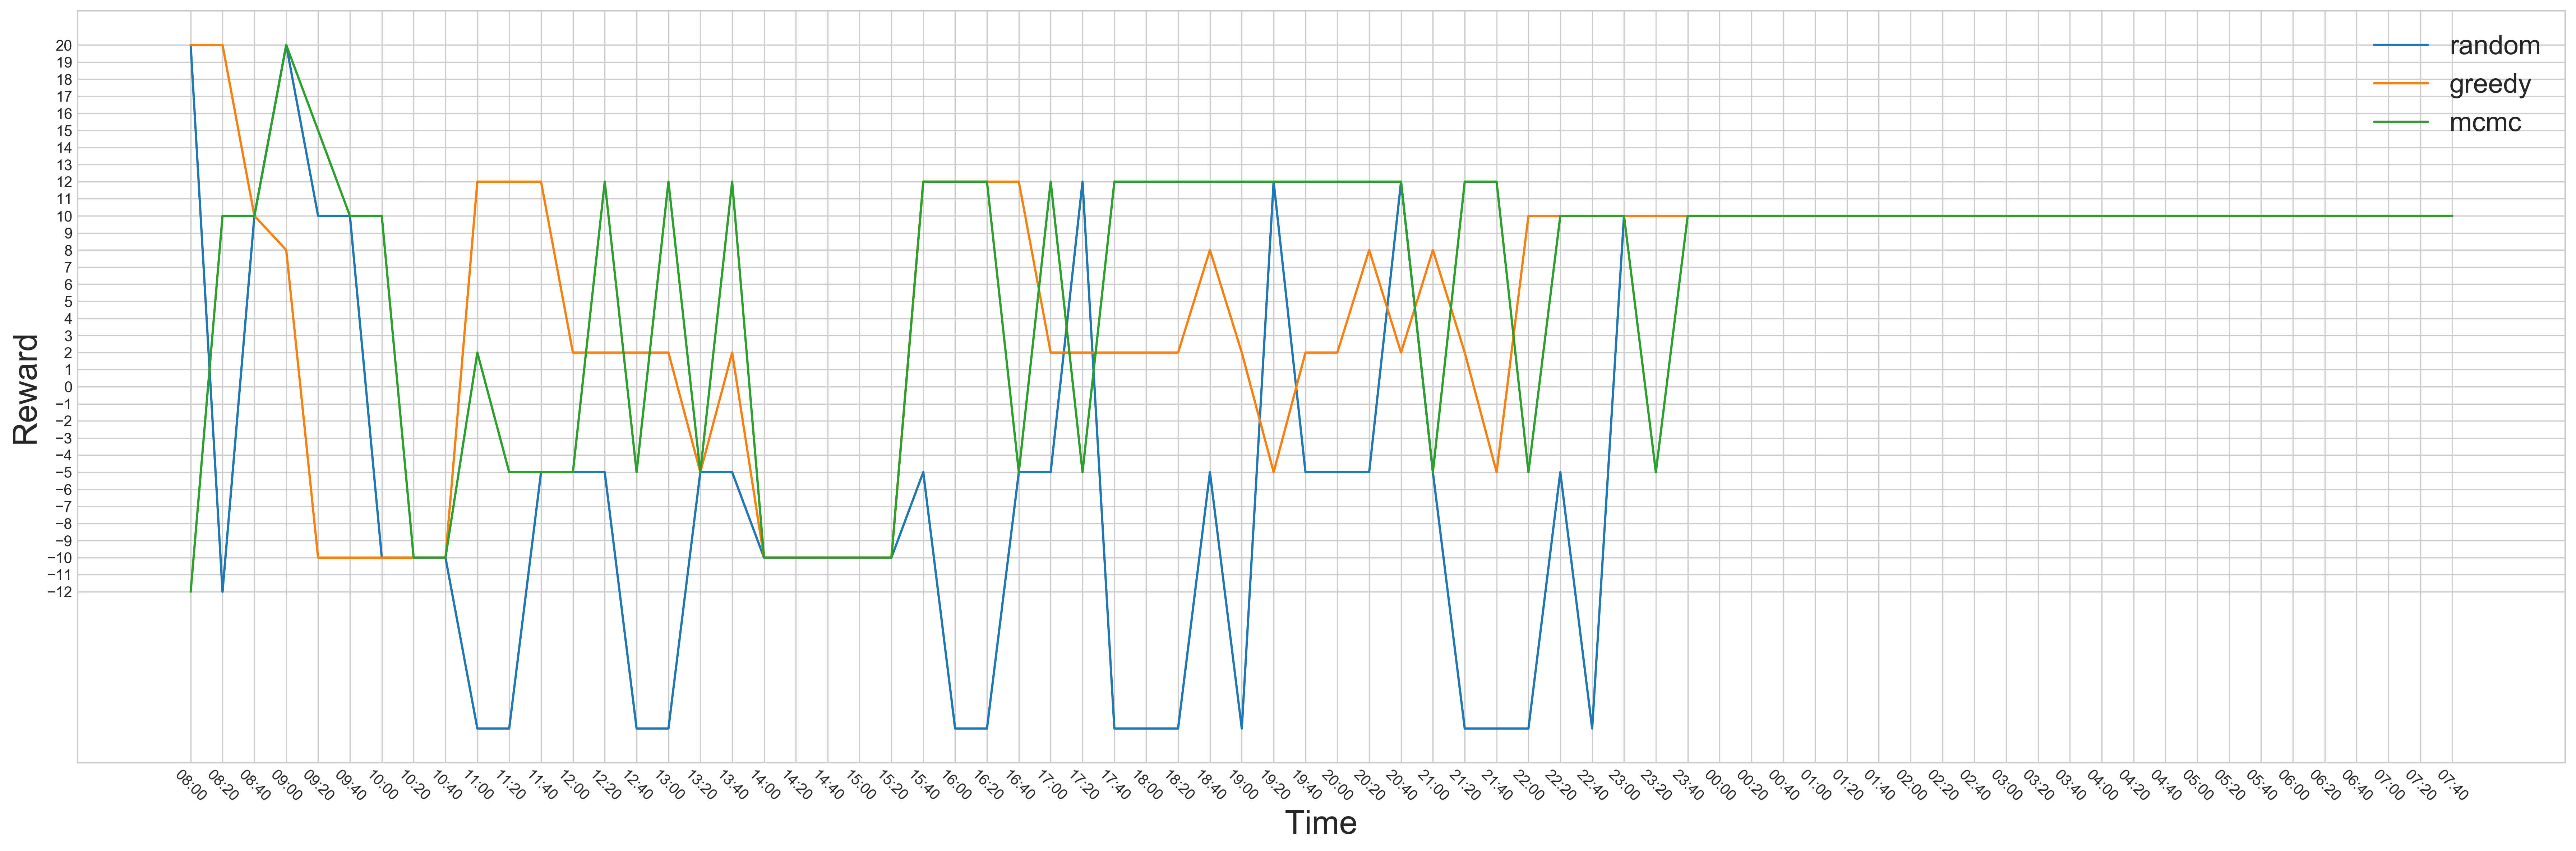

In [169]:
reward_result_random = pd.DataFrame(reward_result_random, columns = ['time', 'activity', 'reward'])
reward_result_greedy = pd.DataFrame(reward_result_greedy, columns = ['time', 'activity', 'reward'])
reward_result_mcmc = pd.DataFrame(reward_result_mcmc, columns = ['time', 'activity', 'reward'])
x = reward_result_random['time']
y_random = reward_result_random['reward']
y_greedy = reward_result_greedy['reward']
y_mcmc = reward_result_mcmc['reward']
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(24, 8), dpi=300)
plt.plot(x, y_random, label = 'random')
plt.plot(x, y_greedy, label = 'greedy')
plt.plot(x, y_mcmc, label = 'mcmc')
plt.xticks(x, rotation=-45)
plt.yticks(range(min(y), max(y) + 1))
plt.xlabel('Time', font_label)
plt.ylabel('Reward', font_label)
plt.legend(prop = font_legend)
plt.tight_layout()
plt.savefig('policy_eval.png', dpi = 300)
plt.show()

In [20]:
def mrp(ini_state):
    result = []
    cur_state = ini_state
    while cur_state != 'sleep':
        print(cur_state)
        result.append((cur_state, reward[cur_state]))
        if cur_state == 'class1':
            p = random.randint(0, 9)
            if p < 5:
                cur_state = next_stage[cur_state][0]
            else:
                cur_state = next_stage[cur_state][1]
        elif cur_state == 'class2':
            p = random.randint(0, 9)
            if p < 3:
                cur_state = next_stage[cur_state][0]
            else:
                cur_state = next_stage[cur_state][1]
        elif cur_state == 'class3':
            p = random.randint(0, 9)
            if p < 6:
                cur_state = next_stage[cur_state][0]
            else:
                cur_state = next_stage[cur_state][1]
        elif cur_state == 'pass':
            cur_state = next_stage[cur_state][0]
        elif cur_state == 'facebook':
            p = random.randint(0, 9)
            if p < 9:
                cur_state = next_stage[cur_state][0]
            else:
                cur_state = next_stage[cur_state][1]
        elif cur_state == 'pub':
            p = random.randint(0, 9)
            if p < 2:
                cur_state = next_stage[cur_state][0]
            elif 2 <= p < 4:
                cur_state = next_stage[cur_state][1]
            else:
                cur_state = next_stage[cur_state][2]
    result.append(('sleep', 0))
    return result